In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 5]

C:\Users\acer\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\acer\miniconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\acer\miniconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [19]:
# import the tweet dataset

df = pd.read_csv('tweet_dset.csv')
df = df[df['ticker'] == '$AAPL']

In [20]:
df['ctime'] = pd.to_datetime(df['date_time'], unit='s')
df = df.set_index('ctime')

Text(0.5, 1.0, 'Fig.27: Apple-related tweets and their sentiment')

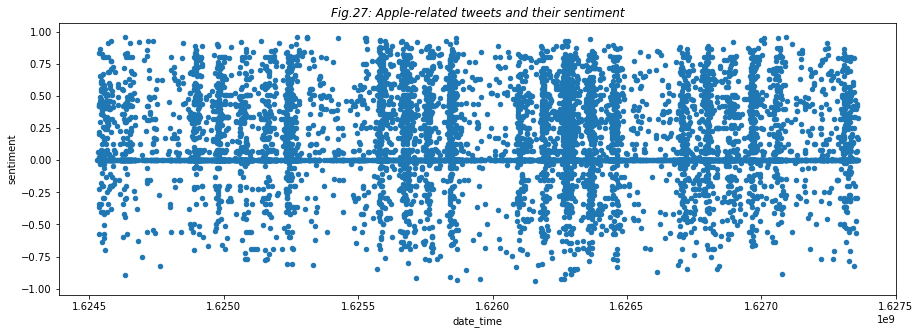

In [21]:
# tweets scatterplot 

df.plot.scatter(x = 'date_time', y = 'sentiment')
plt.title('Fig.27: Apple-related tweets and their sentiment', style='italic')

In [22]:
# compute daily and hourly averages

df['ctime'] = pd.to_datetime(df['date_time'], unit='s')
df = df.set_index('ctime')
mean = df['sentiment'].resample('1d').mean()
hour_mean = df['sentiment'].resample('1h').mean()

In [23]:
# delete weekends

bdays = mean[mean.index.dayofweek < 5]

In [ ]:
# hourly-average plot

hour_mean.plot()
plt.title('Fig.28: Apple hourly-avg sentiment', style='italic')

Text(0.5, 1.0, 'Fig.29: Apple daily-avg sentiment')

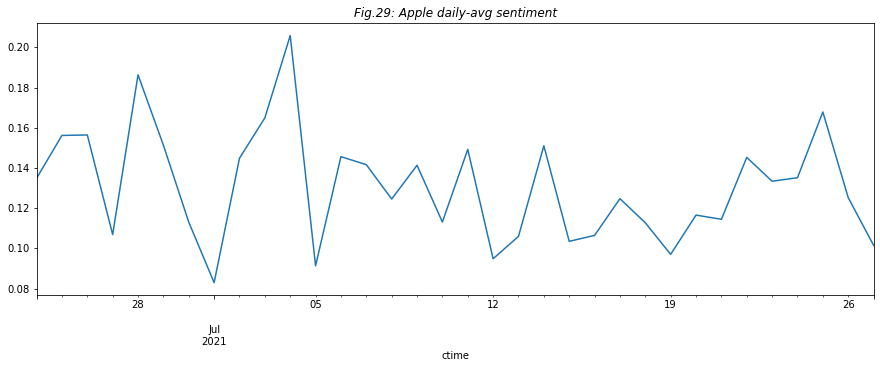

In [24]:
# daily-average plot

mean.plot()
plt.title('Fig.29: Apple daily-avg sentiment', style='italic')

In [25]:
# average value

total_mean = df['sentiment'].mean()
total_mean

0.1304931790622474

Text(0.5, 1.0, 'Fig.30: Apple-related tweets per day')

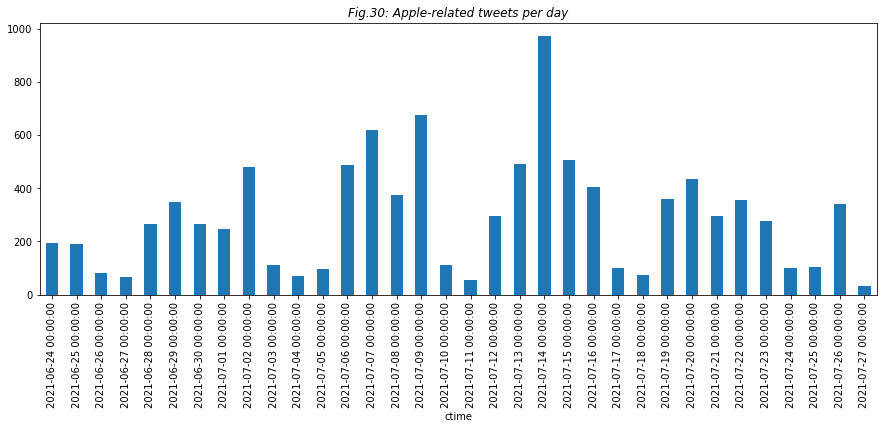

In [27]:
# number of tweets

count = df['sentiment'].resample('1d').count()
count.plot.bar()
plt.title('Fig.30: Apple-related tweets per day', style='italic')

In [28]:
import yfinance as yf
import pandas as pd
import sklearn
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt

In [29]:
# download stock values and compute returns

apl = yf.Ticker("AAPL")
apple = apl.history(start="2021-06-24", end="2021-07-28", interval="1d")

returns = apple['Close'] + apple['Dividends']
diff = returns.diff()
Diff = diff.dropna()

In [31]:
# check and always use dataframe of equal lenght

print(len(diff), len(Diff), len(mean), len(bdays))

24 24 34 23


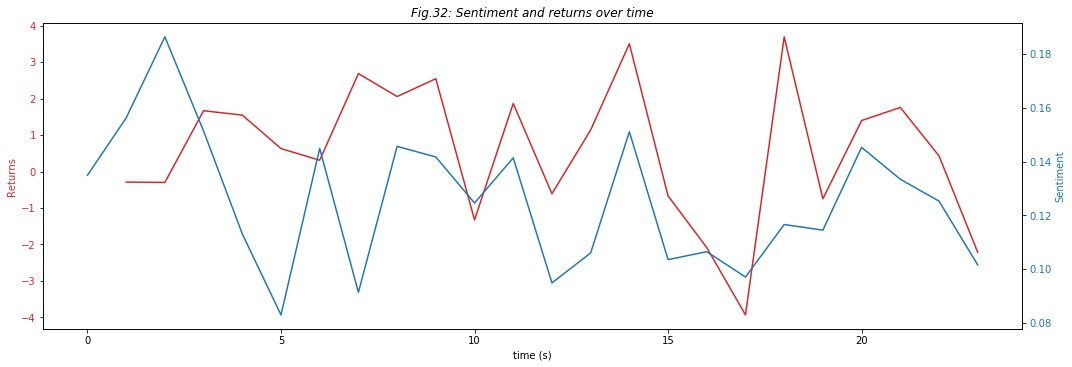

In [32]:
# plot sentiment against returns

t = range(len(diff))
data1 = diff.values
data2 = bdays.values #use bdays when using stocks instead of mean

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Returns', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Sentiment', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Fig.32: Sentiment and returns over time', style='italic')
plt.show()

In [34]:
# hit ratio

sentiments = bdays[1:]
prices = diff[1:]
correct_count = 0
for i in range(2, len(prices)):
    delta_sent = sentiments[i-1] - sentiments[i-2]
    delta_price = prices[i] - prices[i-1]
    if ((delta_sent > 0) and (delta_price > 0)) or(( delta_sent <= 0) and (delta_price <= 0)):
        correct_count += 1
print(correct_count/( len(diff)-2))

0.5909090909090909


In [35]:
# opposite hit ratio
1-(correct_count/( len(diff)-2))

0.40909090909090906